<a href="https://colab.research.google.com/github/Ph1so/Diabetes-Prediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

In [2]:
!unzip "/content/diabetes data set.zip"

Archive:  /content/diabetes data set.zip
  inflating: Testing.csv             
  inflating: Training.csv            


In [22]:
import numpy as np
import pandas as pd

#understand data
import seaborn as sns
from matplotlib import pyplot as plt

#preproccessing
from sklearn.preprocessing import StandardScaler

#training
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#evaluations
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_auc_score

# Import data

In [4]:
df_train = pd.read_csv('Training.csv')
df_test = pd.read_csv('Testing.csv')

# Understanding the data

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2460 non-null   int64  
 1   Glucose                   2460 non-null   int64  
 2   BloodPressure             2460 non-null   int64  
 3   SkinThickness             2460 non-null   int64  
 4   Insulin                   2460 non-null   int64  
 5   BMI                       2460 non-null   float64
 6   DiabetesPedigreeFunction  2460 non-null   float64
 7   Age                       2460 non-null   int64  
 8   Outcome                   2460 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 173.1 KB


In [7]:
df_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,3.817480,121.602033,68.915041,20.531301,80.119919,31.990447,0.491440,32.821951,0.390244
std,3.296458,31.789270,19.082655,15.716901,116.765807,7.802569,0.363917,11.251208,0.487904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.100000,0.251750,24.000000,0.000000
50%,3.000000,117.000000,70.000000,23.000000,36.000000,32.100000,0.381000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,129.000000,36.500000,0.647000,39.000000,1.000000
max,17.000000,197.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


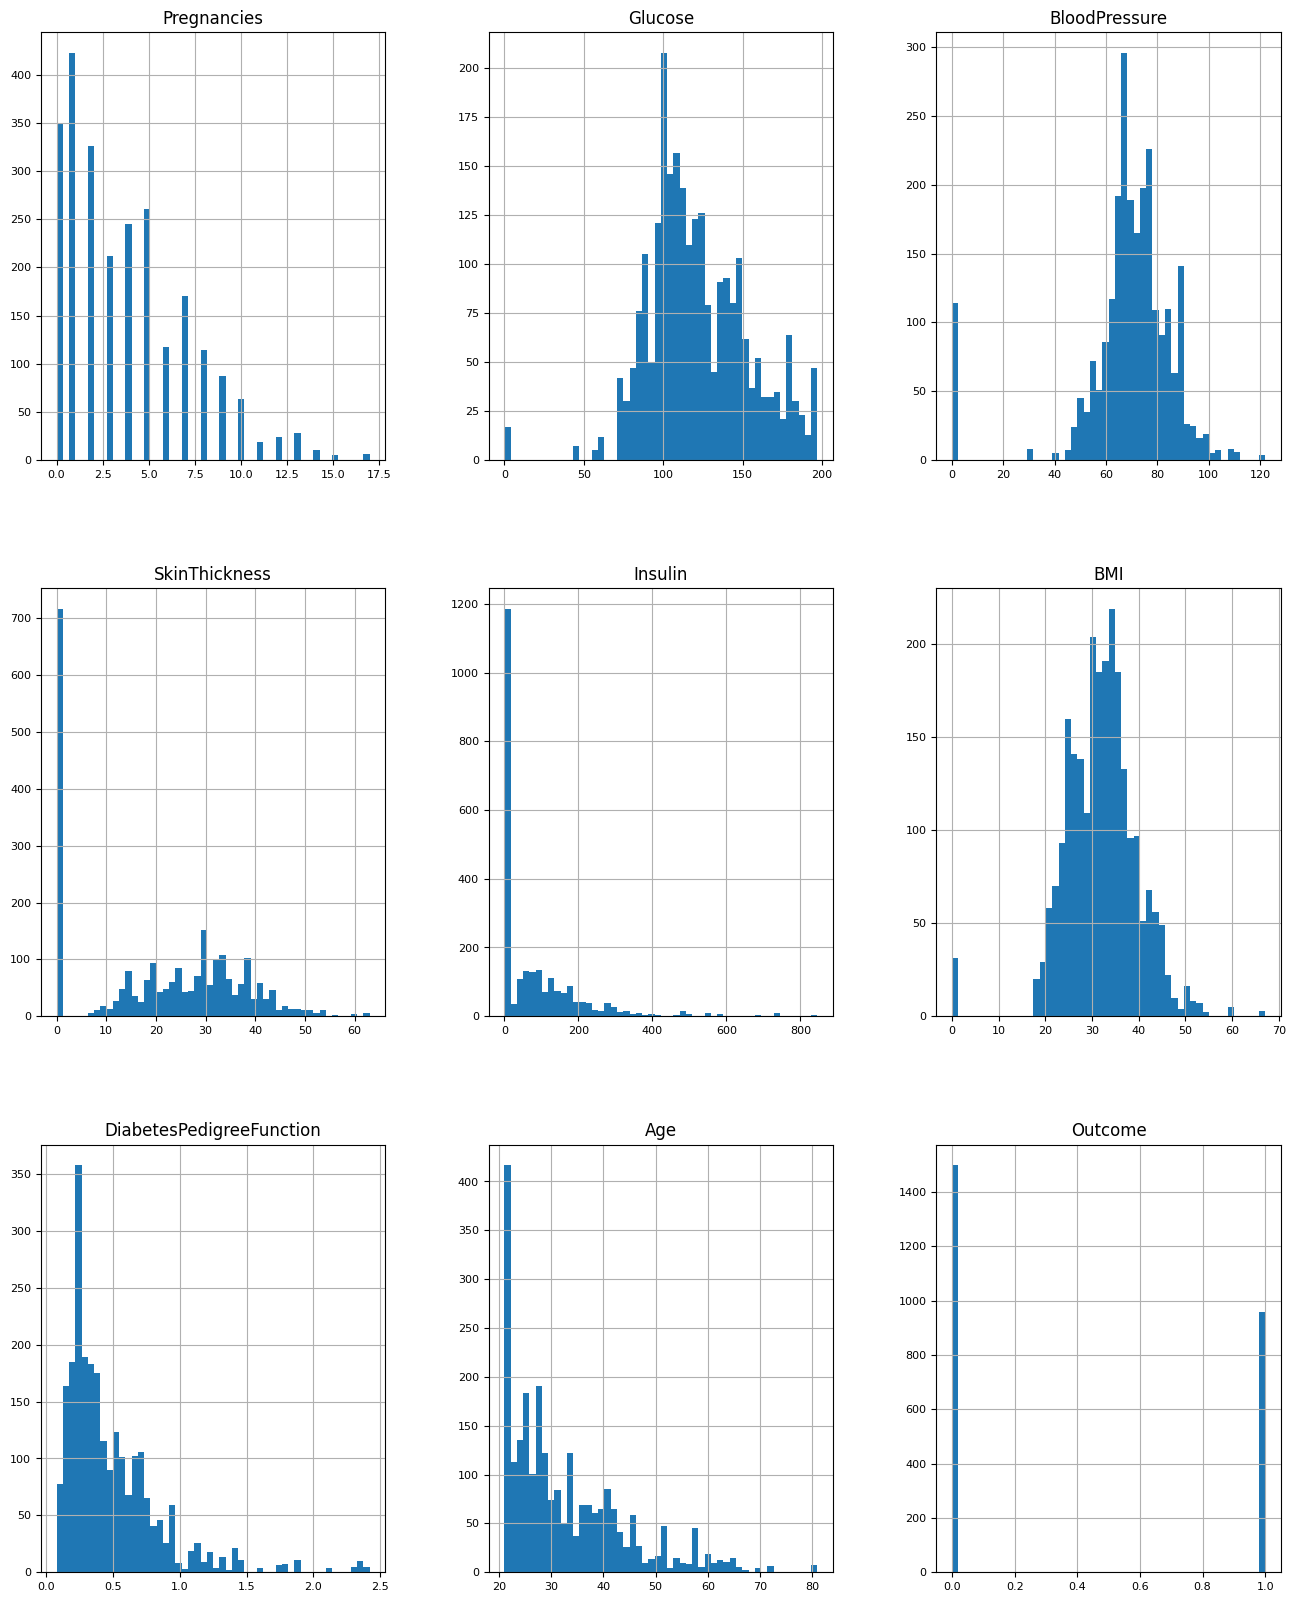

In [8]:
df_train.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

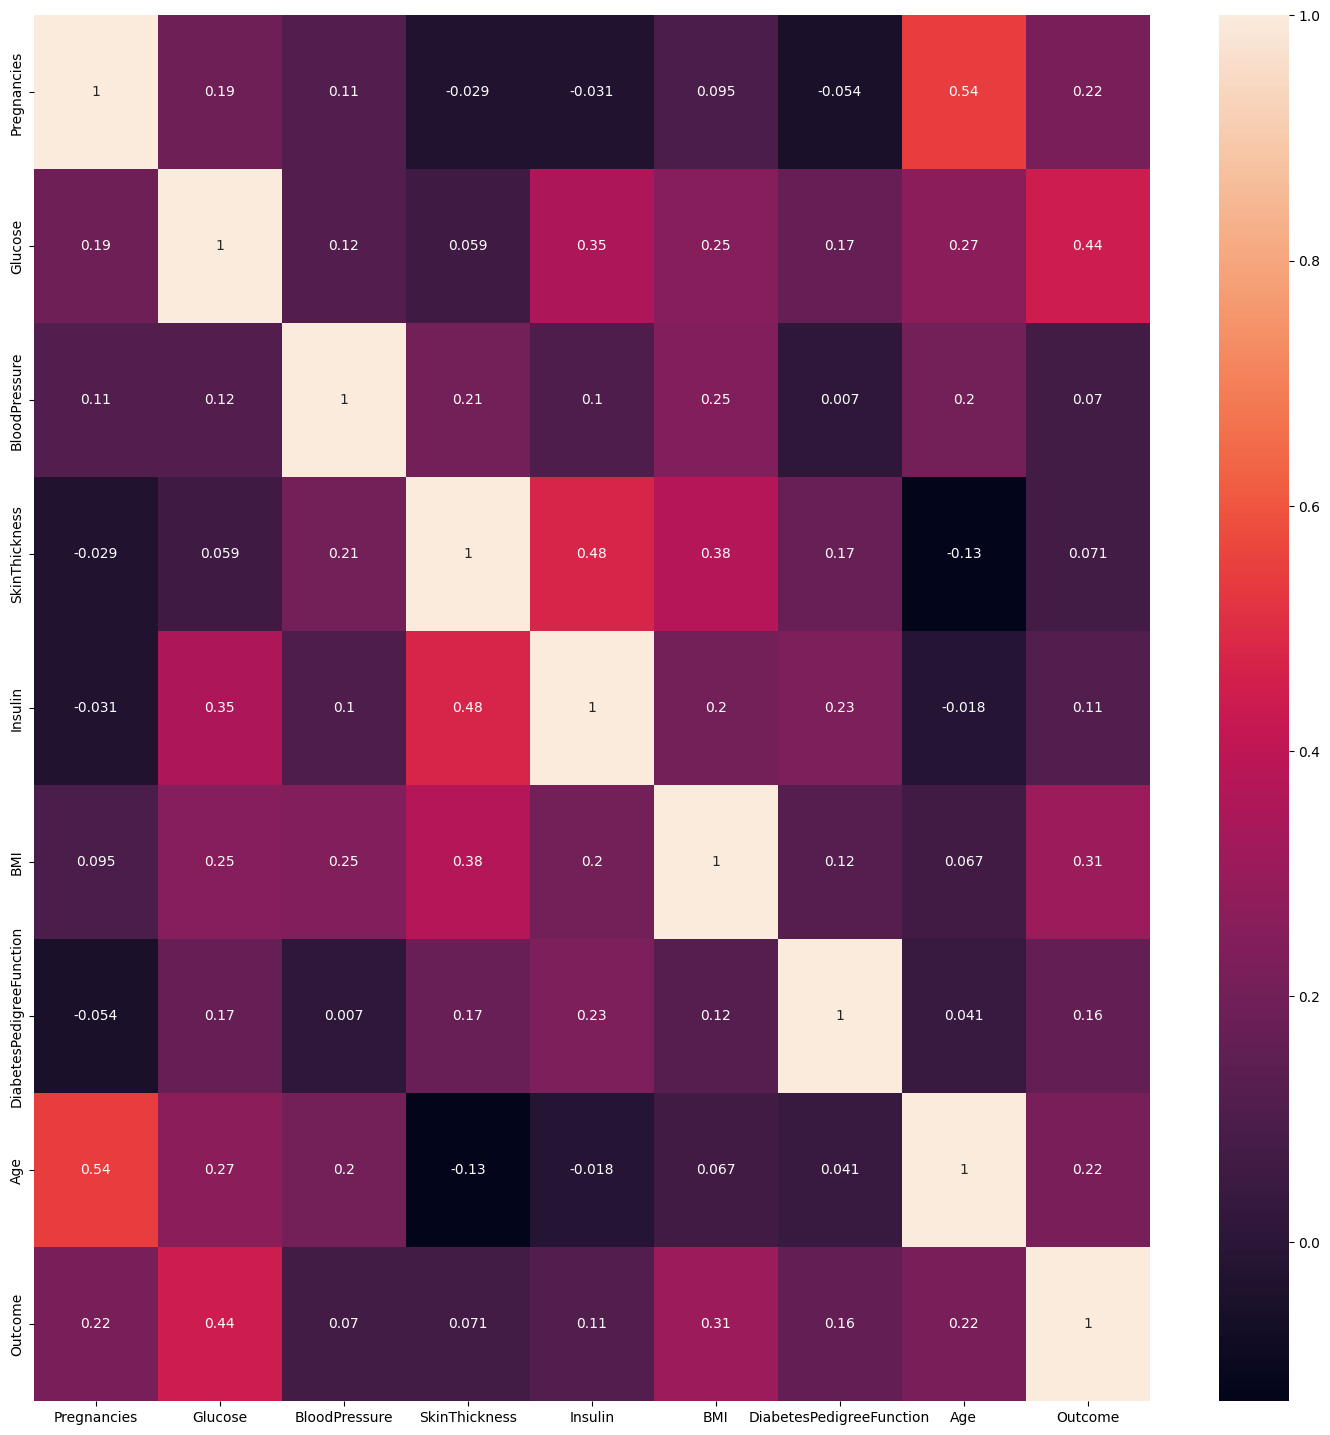

In [9]:
plt.subplots(figsize = (18, 18))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

# Training

In [10]:
y = df_train['Outcome']
df_train.drop('Outcome', axis = 1, inplace = True)
X = df_train
ytest = df_test['Outcome']
df_test.drop('Outcome', axis = 1, inplace = True)
Xtest = df_test

In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
Xtest = scaler.transform(Xtest)
X = pd.DataFrame(X)
Xtest = pd.DataFrame(Xtest)

In [12]:
log = LogisticRegression(max_iter = 1000)
log.fit(X, y)
logp = log.predict(Xtest)

In [13]:
rfc = RandomForestClassifier()
rfc.fit(X, y)
rfcp = rfc.predict(Xtest)

In [14]:
knc = KNeighborsClassifier()
knc.fit(X, y)
kncp = knc.predict(Xtest)

In [15]:
dtc = DecisionTreeClassifier()
dtc.fit(X, y)
dtcp = dtc.predict(Xtest)

In [16]:
gbc = GradientBoostingClassifier()
gbc.fit(X, y)
gbcp = gbc.predict(Xtest)

# Evaluation

In [23]:
def eval(y_test, p, model):
  print(classification_report(y_test, p))
  lr_cm = confusion_matrix(y_test, p)
  sns.set_context("notebook")
  ConfusionMatrixDisplay(confusion_matrix = lr_cm, display_labels = model.classes_).plot()

  roc_auc = round(roc_auc_score(y_test, p), 4)
  accuracy = round(accuracy_score(y_test, p), 4)
  recall = round(recall_score(y_test, p), 4)
  precision = round(precision_score(y_test, p), 4)
  f_one = round(f1_score(y_test, p), 4)

  print(f"=========================")
  print(f" ROC-AUC Score: {roc_auc}")
  print(f" Accuracy Score: {accuracy}")
  print(f" Recall Score: {recall}")
  print(f" Precision Score: {precision}")
  print(f" F1-score: {f_one}")
  print(f"=========================")


Logistic Regression

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       215
           1       0.70      0.61      0.65        93

    accuracy                           0.80       308
   macro avg       0.77      0.75      0.76       308
weighted avg       0.80      0.80      0.80       308

 ROC-AUC Score: 0.7483
 Accuracy Score: 0.8019
 Recall Score: 0.6129
 Precision Score: 0.6951
 F1-score: 0.6514


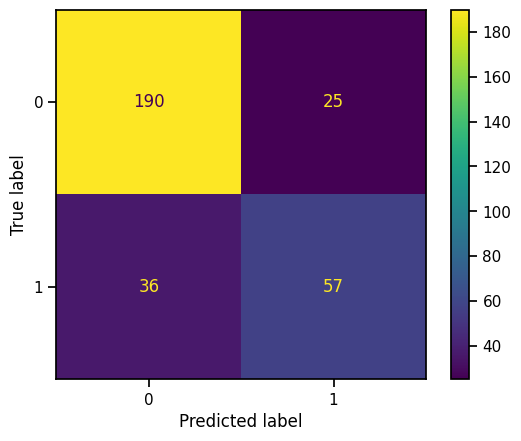

In [24]:
eval(ytest, logp, log)

Random Forest Classifier

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       215
           1       0.69      0.66      0.67        93

    accuracy                           0.81       308
   macro avg       0.77      0.76      0.77       308
weighted avg       0.80      0.81      0.80       308

 ROC-AUC Score: 0.7628
 Accuracy Score: 0.8052
 Recall Score: 0.6559
 Precision Score: 0.6854
 F1-score: 0.6703


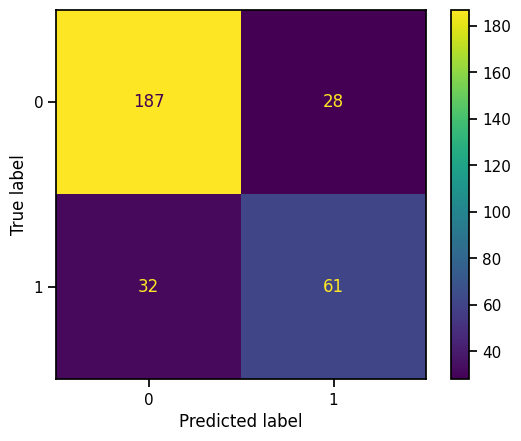

In [25]:
eval(ytest, rfcp, rfc)

KNeighbors Classification

              precision    recall  f1-score   support

           0       0.82      0.74      0.78       215
           1       0.52      0.63      0.57        93

    accuracy                           0.71       308
   macro avg       0.67      0.69      0.68       308
weighted avg       0.73      0.71      0.72       308

 ROC-AUC Score: 0.6893
 Accuracy Score: 0.711
 Recall Score: 0.6344
 Precision Score: 0.5175
 F1-score: 0.57


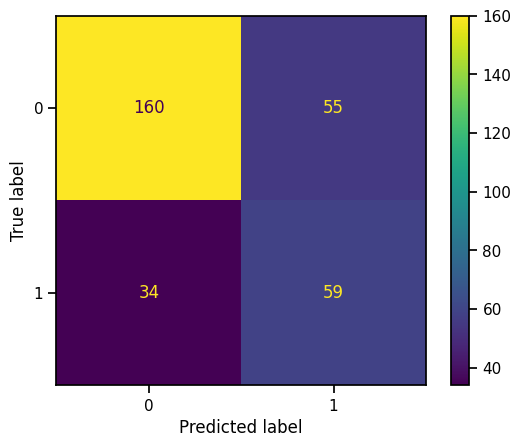

In [26]:
eval(ytest, kncp, knc)

Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       215
           1       0.47      0.53      0.49        93

    accuracy                           0.68       308
   macro avg       0.62      0.63      0.63       308
weighted avg       0.69      0.68      0.68       308

 ROC-AUC Score: 0.6332
 Accuracy Score: 0.6753
 Recall Score: 0.5269
 Precision Score: 0.4667
 F1-score: 0.4949


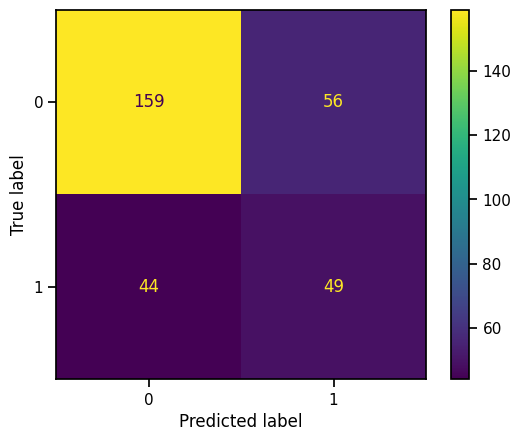

In [27]:
eval(ytest, dtcp, dtc)

Gradient Boosted Classifier

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       215
           1       0.64      0.66      0.65        93

    accuracy                           0.78       308
   macro avg       0.74      0.75      0.74       308
weighted avg       0.78      0.78      0.78       308

 ROC-AUC Score: 0.7466
 Accuracy Score: 0.7825
 Recall Score: 0.6559
 Precision Score: 0.6354
 F1-score: 0.6455


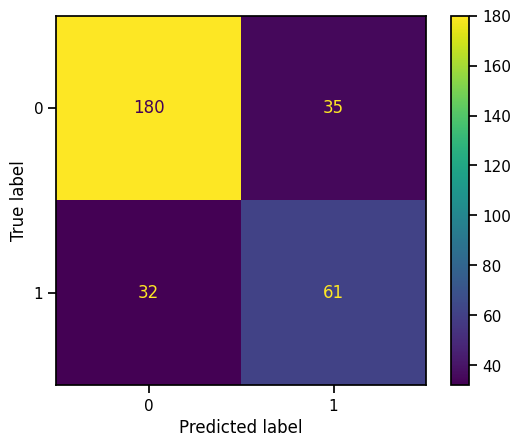

In [28]:
eval(ytest, gbcp, gbc)